### IMPORTING LIBRARIES

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTING THE CSV FILE CONTAINING THE DATASET

In [37]:
df = pd.read_csv('train.csv')
df.head()
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


### DROPPING UNNECESSARY 'sl_no' COLUMN

In [39]:
df.drop('sl_no',axis=1,inplace=True)

### NO OF NULL VALUES IN EACH COLUMN

In [41]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### DROPPING DUPLICATE ROWS

In [43]:
df.drop_duplicates(inplace=True)
df.shape

(215, 14)

### MEAN AND MEDIAN OF SALARY

In [45]:
df['salary'].mean()
df['salary'].median()

265000.0

### HISTOGRAM SHOWING SALARY DISTRIBUTION

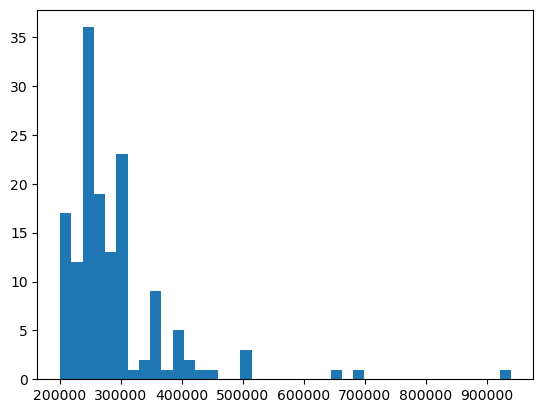

In [47]:
plt.hist(x=df['salary'], bins=40)
plt.show()

In [48]:
df['status'].value_counts()
df['salary'] = df['salary'].fillna(0)
df.isnull().sum()
obj = []
for col in df.columns:
    if df[col].dtype == "object":
        obj.append(col)
        print(col,df[col].unique(),len(df[col].unique()))

ssc_b ['Others' 'Central'] 2
hsc_b ['Others' 'Central'] 2
hsc_s ['Commerce' 'Science' 'Arts'] 3
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others'] 3
workex ['No' 'Yes'] 2
specialisation ['Mkt&HR' 'Mkt&Fin'] 2
status ['Placed' 'Not Placed'] 2


In [49]:
import warnings
warnings.filterwarnings("ignore")

### GENDER DISTRIBUTION

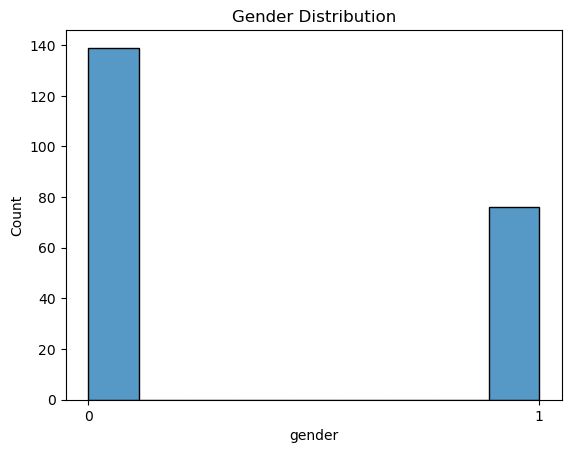

In [51]:
sns.histplot(data=df,x='gender')
plt.title("Gender Distribution")
plt.xticks([0,1],labels=[0,1])
plt.show()

### PAIRPLOT WITH GENDERS

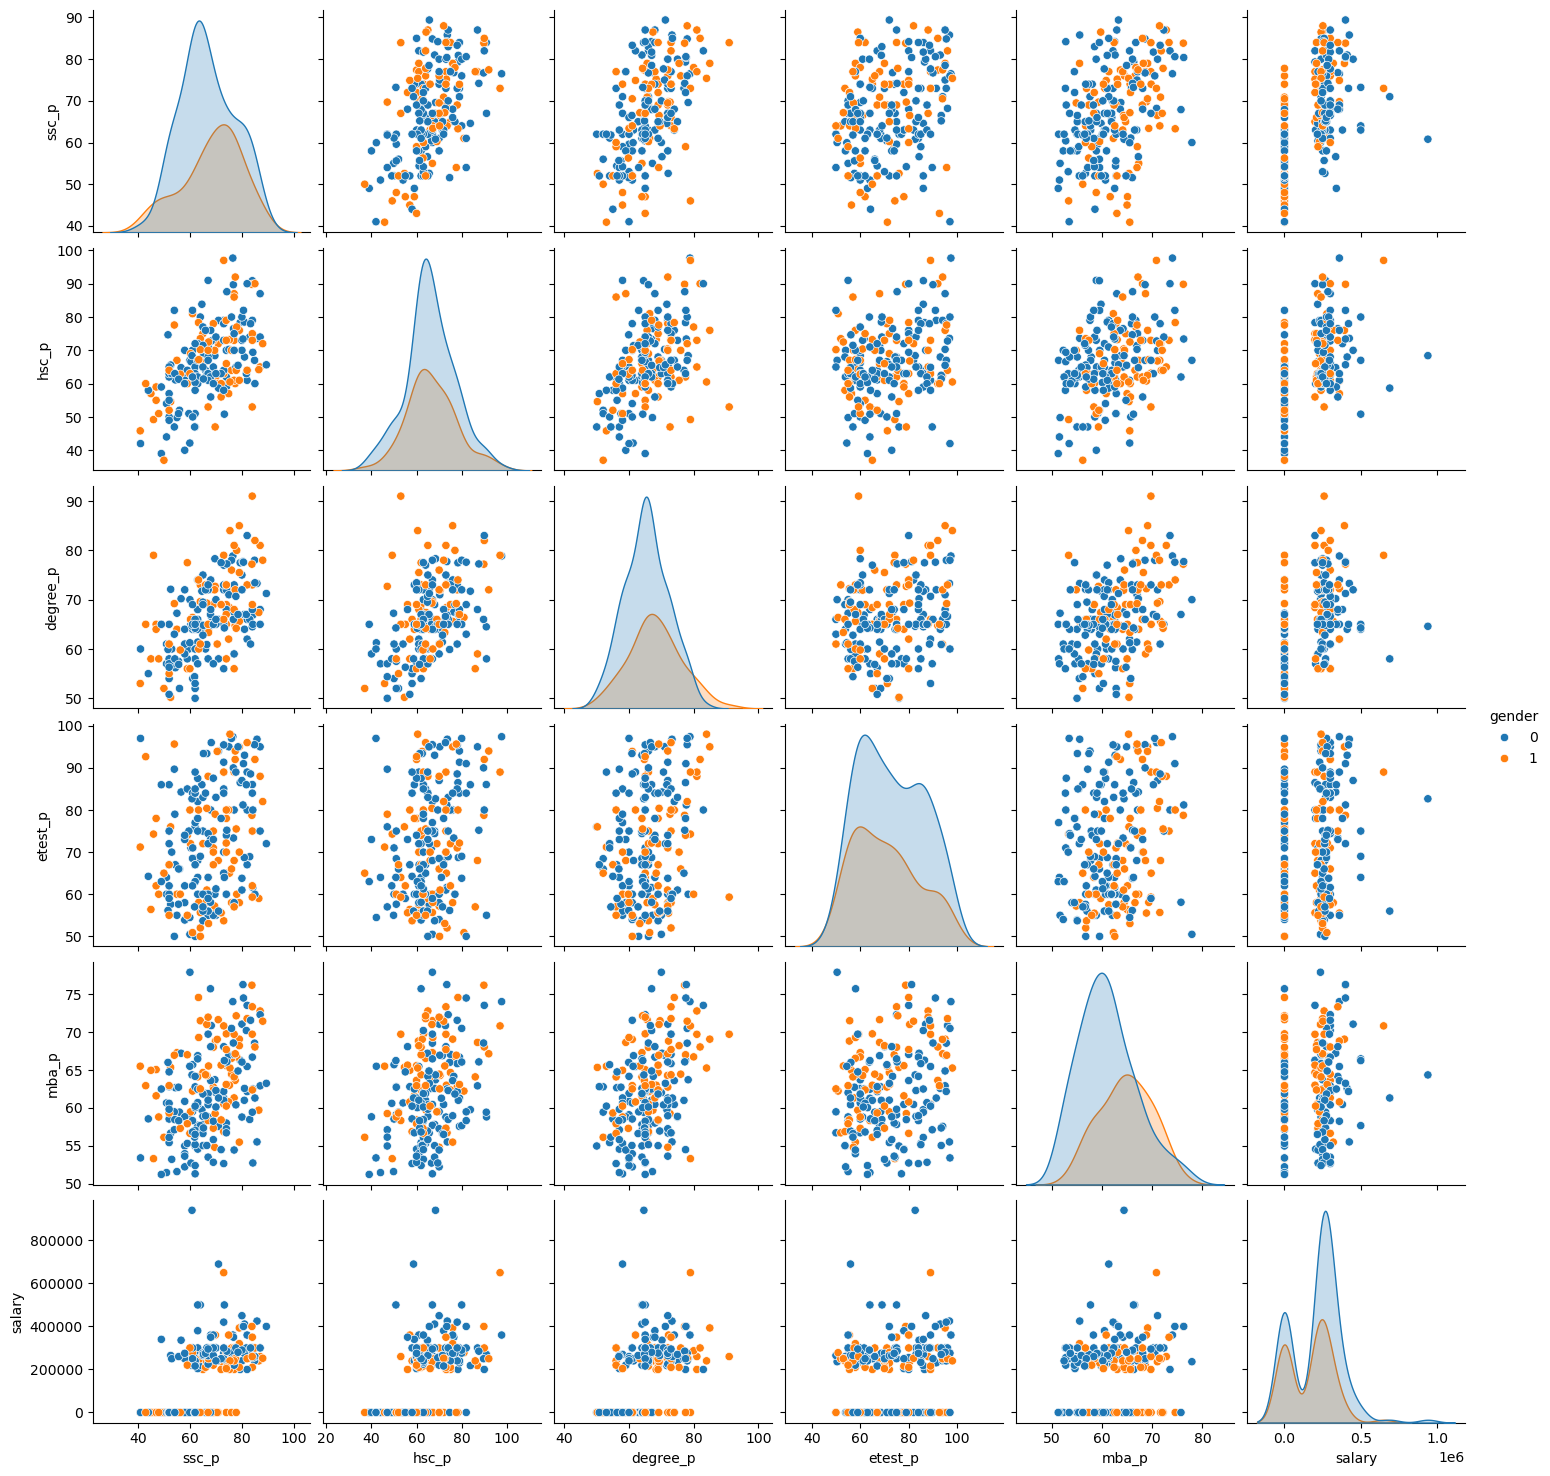

In [53]:
sns.pairplot(data=df, hue='gender')
plt.show()

In [54]:
mkt_hr_data = df[df['specialisation'] == 'Mkt&HR']
mkt_fin_data = df[df['specialisation'] == 'Mkt&Fin']

### BOXPLOTS WITH SPECIALIZATION ON X AXIS AND PERCENTAGES ON Y AXIS

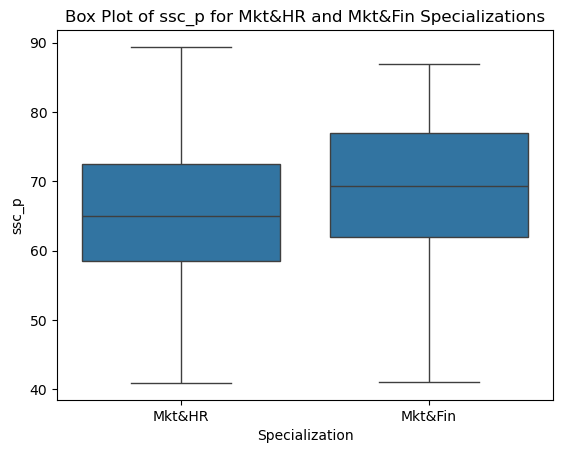

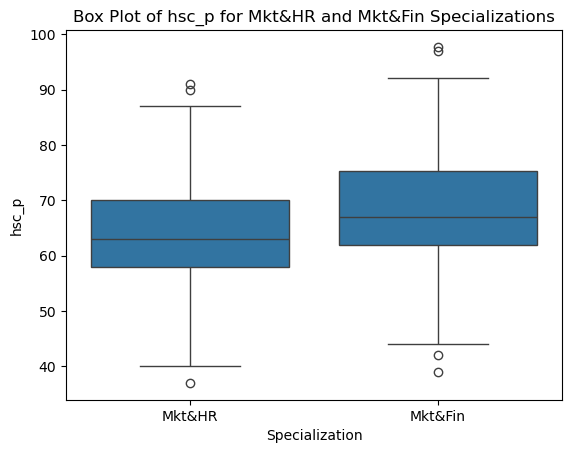

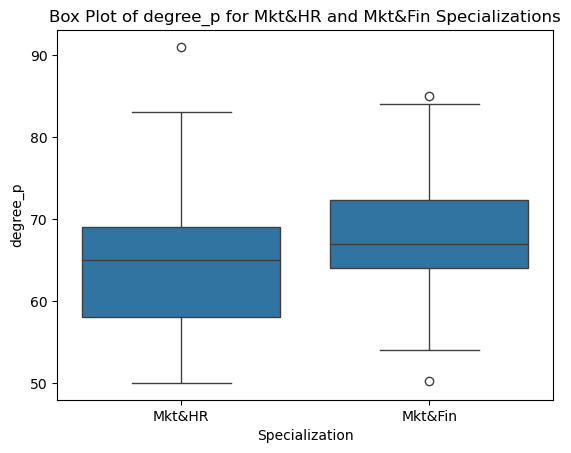

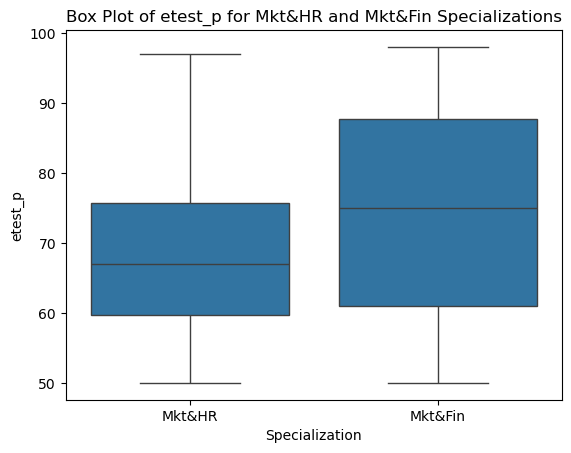

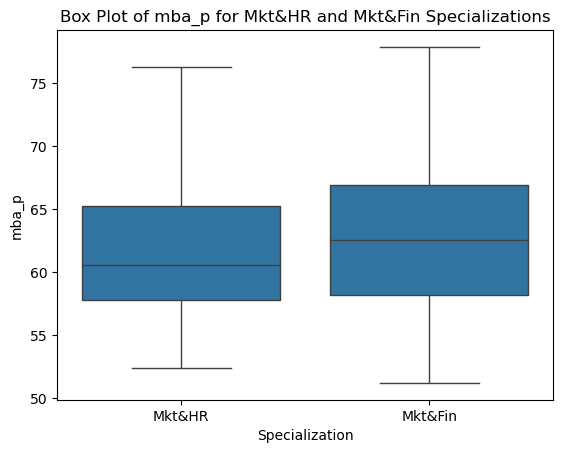

In [56]:
sns.boxplot(x='specialisation', y='ssc_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of ssc_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('ssc_p')
plt.show()
sns.boxplot(x='specialisation', y='hsc_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of hsc_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('hsc_p')
plt.show()
sns.boxplot(x='specialisation', y='degree_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of degree_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('degree_p')
plt.show()
sns.boxplot(x='specialisation', y='etest_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of etest_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('etest_p')
plt.show()
sns.boxplot(x='specialisation', y='mba_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of mba_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('mba_p')
plt.show()

### PLACEMENT DISTRIBUTION

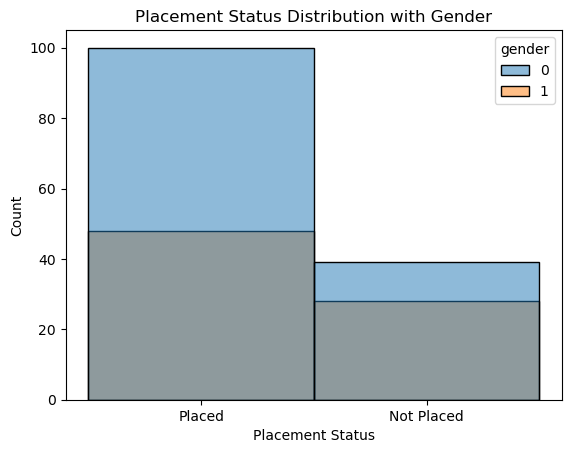

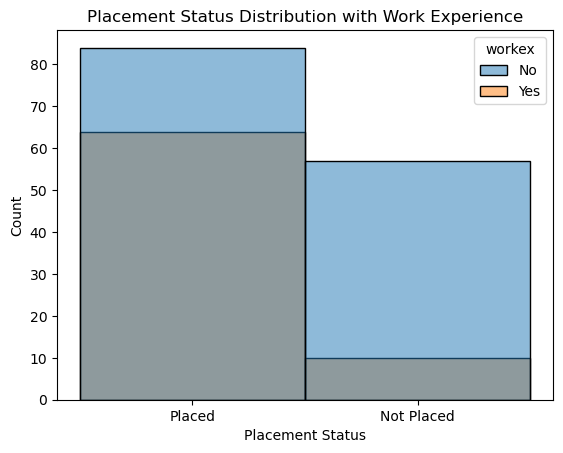

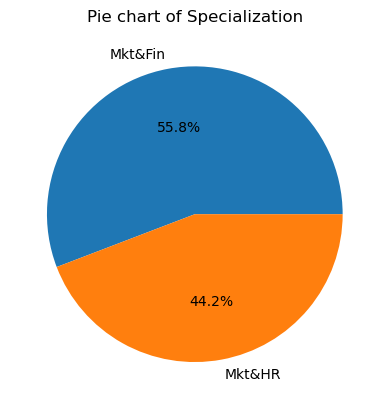

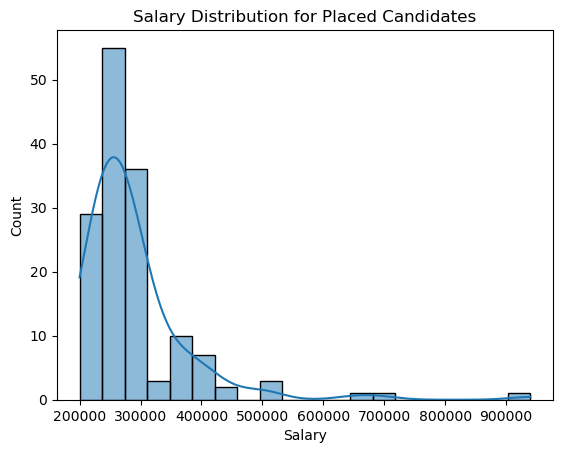

In [58]:
sns.histplot(data=df,x='status',hue='gender')
plt.title('Placement Status Distribution with Gender')
plt.xlabel('Placement Status')
plt.show()
sns.histplot(data=df,x='status',hue='workex')
plt.title('Placement Status Distribution with Work Experience')
plt.xlabel('Placement Status')
plt.show()
plt.pie(df['specialisation'].value_counts(), labels=df['specialisation'].value_counts().index, autopct='%1.1f%%')
plt.title("Pie chart of Specialization")
plt.show()
placed_data = df[df['status'] == 'Placed']
sns.histplot(placed_data['salary'], kde=True, bins=20)
plt.title('Salary Distribution for Placed Candidates')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

### CORRELATION HEAT MAP

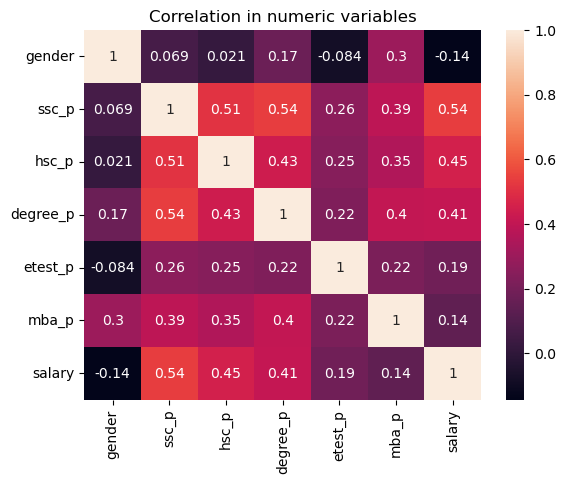

In [60]:
cols = []
for col in df.columns:
    if df[col].dtype != "object":
        cols.append(col)
corr = df[cols].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation in numeric variables')
plt.show()

### OHE WITH TWO VALUES VARIABLE

In [62]:
for col in df.columns:
    if df[col].dtype == "object":
        print(col,df[col].unique(),len(df[col].unique()))
df['ssc_b_Central'] = df['ssc_b'].map({'Central':1,'Others':0})
df['hsc_b_Central'] = df['hsc_b'].map({'Central':1,'Others':0})
df['workex'] = df['workex'].map({'No':0,'Yes':1})
df['status'] = df['status'].map({'Placed':1,'Not Placed':0})
df['specialisation_fin'] = df['specialisation'].map({'Mkt&HR':0,'Mkt&Fin':1})
df.head()
df.drop(['ssc_b','hsc_b','specialisation'],axis=1,inplace=True)
df.head()

ssc_b ['Others' 'Central'] 2
hsc_b ['Others' 'Central'] 2
hsc_s ['Commerce' 'Science' 'Arts'] 3
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others'] 3
workex ['No' 'Yes'] 2
specialisation ['Mkt&HR' 'Mkt&Fin'] 2
status ['Placed' 'Not Placed'] 2


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,mba_p,status,salary,ssc_b_Central,hsc_b_Central,specialisation_fin
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,58.80,1,270000.0,0,0,0
1,0,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,66.28,1,200000.0,1,0,1
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,57.80,1,250000.0,1,1,1
3,0,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,59.43,0,0.0,1,1,0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,55.50,1,425000.0,1,1,1


### OHE WITH THREE VALUES VARIABLE

In [64]:
ohe = pd.get_dummies(df[['hsc_s','degree_t']],drop_first=True).astype(int)
ohe

,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,0,0,1
1,0,1,0,1
2,0,0,0,0
3,0,1,0,1
4,1,0,0,0
...,...,...,...,...
210,1,0,0,0
211,0,1,0,1
212,1,0,0,0
213,1,0,0,0


In [65]:
df1 = pd.concat([ohe,df.drop(['hsc_s','degree_t'],axis=1)],axis=1)
df1.head()

,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,ssc_b_Central,hsc_b_Central,specialisation_fin
0,1,0,0,1,0,67.00,91.00,58.00,0,55.0,58.80,1,270000.0,0,0,0
1,0,1,0,1,0,79.33,78.33,77.48,1,86.5,66.28,1,200000.0,1,0,1
2,0,0,0,0,0,65.00,68.00,64.00,0,75.0,57.80,1,250000.0,1,1,1
3,0,1,0,1,0,56.00,52.00,52.00,0,66.0,59.43,0,0.0,1,1,0
4,1,0,0,0,0,85.80,73.60,73.30,0,96.8,55.50,1,425000.0,1,1,1


### CORRELATION OF FEATURES WITH TARGET VARIABLE

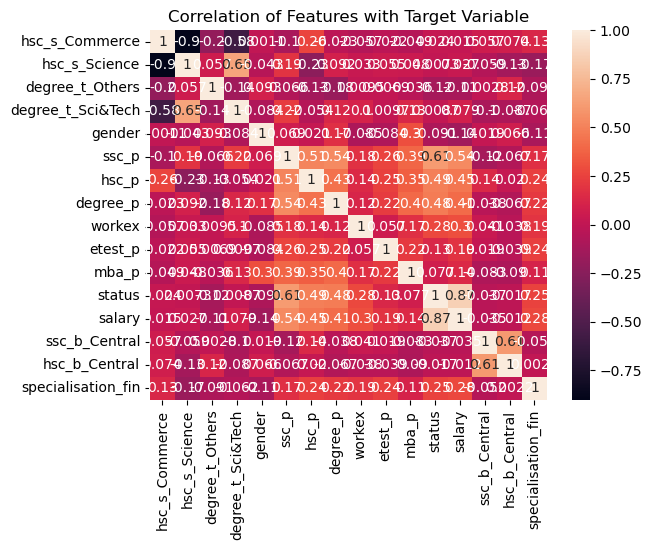

In [67]:
corr1 = df1.corr()
sns.heatmap(corr1,annot=True)
plt.title('Correlation of Features with Target Variable')
plt.show()

### CORR VARIABLE

In [69]:
correlated_variable = corr1['salary'].abs().sort_values(ascending=False)
correlated_variable

salary                1.000000
status                0.865774
ssc_p                 0.538090
hsc_p                 0.452569
degree_p              0.408371
workex                0.298285
specialisation_fin    0.275766
etest_p               0.186988
gender                0.143110
mba_p                 0.139823
degree_t_Others       0.107139
degree_t_Sci&Tech     0.079351
ssc_b_Central         0.034594
hsc_s_Science         0.026890
hsc_s_Commerce        0.015239
hsc_b_Central         0.011544
Name: salary, dtype: float64

### INDEPENDENT VARIABLE(X) AND DEPENDENT VARIABLE OR TARGET VARIABLE (y)

In [71]:
X = df1.drop('salary',axis=1)
X
y = df1['salary']
y

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 215, dtype: float64

### training ,testing and splitting data

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
reg.score(X_test_scaled,y_test)

0.7201858259203172

### TESTING THE MODELS

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [76]:
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {

        }
    },
    'lasso': {
        'model': Lasso(max_iter=100000),
        'params': {
            'alpha': [1,2],
            'selection': ['random','cyclic']
        }
    },
    'ridge': {
        'model': Ridge(max_iter=100000),
        'params': {
            'alpha': [1,2]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'splitter': ['best','random']
        }
    },
    'svr': {
        'model': SVR(max_iter=10000000),
        'params': {
         
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [1,5,10,20,50],
            'learning_rate': [0.001,0.01,0.1,0.5]
        }
    }
}

In [77]:
X_scaled = scaler.transform(X)

In [78]:
scores= []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
for algo_name, mp in algos.items():
   reg = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
   reg.fit(X_scaled, y)
   scores.append(
      {
         'model': algo_name,
         'best_score': reg.best_score_,
         'best_params': reg.best_params_
      }
   ) 
score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
score

,model,best_score,best_params
0,linear_regression,0.717640,{}
1,lasso,0.717644,"{'alpha': 2, 'selection': 'random'}"
2,ridge,0.716467,{'alpha': 1}
3,decision_tree,0.498537,"{'criterion': 'squared_error', 'splitter': 'ra..."
4,svr,-0.110433,{}
5,random_forest,0.701379,{'n_estimators': 50}
6,gradient_boosting,0.692680,"{'learning_rate': 0.1, 'n_estimators': 20}"


### APPLYING RIDGE MODEL

In [80]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled,y_train)
ridge.score(X_test_scaled,y_test)

0.7219489075732644

### STORING MODEL AND SCALER FILE

In [82]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(ridge,f)
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
import pandas as pd
import pickle

### LOADING MODEL AND SCALAER

In [84]:
# Load the model and scaler
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)


### MAKING PREDICTIONS AND STORING IT IN PREDICTIONS.CSV FILE

In [86]:
df = pd.read_csv('train.csv')


df['salary'] = df['salary'].fillna(0)
df['ssc_b_Central'] = df['ssc_b'].map({'Central': 1, 'Others': 0})
df['hsc_b_Central'] = df['hsc_b'].map({'Central': 1, 'Others': 0})
df['workex'] = df['workex'].map({'No': 0, 'Yes': 1})
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})
df['specialisation_fin'] = df['specialisation'].map({'Mkt&HR': 0, 'Mkt&Fin': 1})
df.drop(['ssc_b', 'hsc_b', 'specialisation'], axis=1, inplace=True)
ohe = pd.get_dummies(df[['hsc_s', 'degree_t']], drop_first=True).astype(int)
df1 = pd.concat([ohe, df.drop(['hsc_s', 'degree_t'], axis=1)], axis=1)


X = df1.drop(['salary', 'sl_no'], axis=1)


X_scaled = loaded_scaler.transform(X)

# Make predictions
predictions = loaded_model.predict(X_scaled)


df['predicted_salary'] = predictions

# Save the predictions to a CSV file
df.to_csv('predictions.csv', index=False)


print(df.head())
















   sl_no  gender  ssc_p  hsc_p     hsc_s  degree_p   degree_t  workex  \
0      1       0  67.00  91.00  Commerce     58.00   Sci&Tech       0   
1      2       0  79.33  78.33   Science     77.48   Sci&Tech       1   
2      3       0  65.00  68.00      Arts     64.00  Comm&Mgmt       0   
3      4       0  56.00  52.00   Science     52.00   Sci&Tech       0   
4      5       0  85.80  73.60  Commerce     73.30  Comm&Mgmt       0   

   etest_p  mba_p  status    salary  ssc_b_Central  hsc_b_Central  \
0     55.0  58.80       1  270000.0              0              0   
1     86.5  66.28       1  200000.0              1              0   
2     75.0  57.80       1  250000.0              1              1   
3     66.0  59.43       0       0.0              1              1   
4     96.8  55.50       1  425000.0              1              1   

   specialisation_fin  predicted_salary  
0                   0     306062.784630  
1                   1     321560.583565  
2                   